In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)



Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/dinesh/miniconda3/envs/mypy3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/dinesh/miniconda3/envs/mypy3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 128ms/step - loss: 0.5282 - acc: 0.7368 - val_loss: 0.4677 - val_acc: 0.7814
Epoch 2/10
157/157 [==============================] - 21s 132ms/step - loss: 0.3441 - acc: 0.8625 - val_loss: 0.3531 - val_acc: 0.8602
Epoch 3/10
157/157 [==============================] - 21s 136ms/step - loss: 0.2779 - acc: 0.8911 - val_loss: 0.4468 - val_acc: 0.7856
Epoch 4/10
157/157 [==============================] - 19s 123ms/step - loss: 0.2434 - acc: 0.9079 - val_loss: 0.3734 - val_acc: 0.8584
Epoch 5/10
157/157 [==============================] - 19s 121ms/step - loss: 0.2131 - acc: 0.9195 - val_loss: 0.3634 - val_acc: 0.8752
Epoch 6/10
157/157 [==============================] - 19s 120ms/step - loss: 0.1839 - acc: 0.9313 - val_loss: 0.4364 - val_acc: 0.8044
Epoch 7/10
157/157 [==============================] - 19s 120ms/step - loss: 0.1591 - acc: 0.9412 - val_loss: 0.3608 - val_acc: 0.8734
Epoch 8/10
157/157 [==============================] - 1

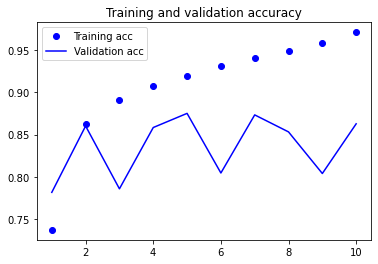

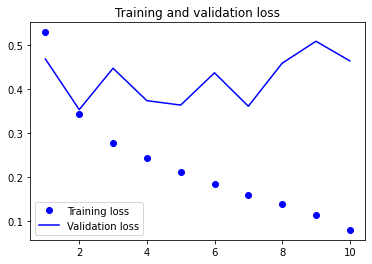

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 45s 286ms/step - loss: 0.5263 - acc: 0.7500 - val_loss: 0.3540 - val_acc: 0.8576
Epoch 2/10
157/157 [==============================] - 40s 258ms/step - loss: 0.2983 - acc: 0.8818 - val_loss: 0.3153 - val_acc: 0.8694
Epoch 3/10
157/157 [==============================] - 40s 255ms/step - loss: 0.2342 - acc: 0.9108 - val_loss: 0.3094 - val_acc: 0.8684
Epoch 4/10
157/157 [==============================] - 43s 272ms/step - loss: 0.2028 - acc: 0.9255 - val_loss: 0.3220 - val_acc: 0.8678
Epoch 5/10
157/157 [==============================] - 65s 413ms/step - loss: 0.1822 - acc: 0.9338 - val_loss: 0.3474 - val_acc: 0.8608
Epoch 6/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1639 - acc: 0.9416 - val_loss: 0.3780 - val_acc: 0.8696
Epoch 7/10
157/157 [==============================] - 58s 369ms/step - loss: 0.1445 - acc: 0.9484 - val_loss: 0.3460 - val_acc: 0.8768
Epoch 8/10
157/157 [==============================] - 5